# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import glob
import re

## Access Files

First step is to navigate to the `Rosenthal` folder under `gallina` and load all the files into an iglob iterator.

### Rosenthal Folder

In [2]:
print("Current directory:",os.getcwd())

Current directory: /mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/notebooks


In [3]:
# Check if the Rosenthal directory exists
ros_path = "/mnt/rds/redhen/gallina/Rosenthal/"
print("Directory exists:",os.path.isdir(ros_path))

# Check that the Rosenthal directory is not empty
ros_items = os.listdir(ros_path)
if len(ros_items)==0:
    print("Error! Directory is empty")
else:
    # If not empty print the subdirectories
    print("Items in directory:",ros_items)

Directory exists: True
Items in directory: ['1972', '1978', '1985', '1961', '1982', '1988', '2006', '1975', '1971', '1962', '1986', '1981', '1976', '1974', '1989', '1983', '1960', '1984', '1979', '1973', '1977', '1980', '1987', '1969', '1963']


In [4]:
# Starting index of the file name (used to remove path info)
FILE_START_INDEX = 58

In [5]:
# Method to traverse through all of the iglob files recursively
def traverse_iglob(files):
    # Establish a counter variable to keep track of no of files.
    ctr=0
    # Maintain a list to extract only the file names
    files_split=[]
    
    # Loop through the iglob iterator and update the variables
    for file in files:
        print(file)
        ctr+=1
        file_split = file[FILE_START_INDEX:].split('_')
        year, month, day = file_split[0].split('-')
        files_split.append([file_split[0]]+[year]+[month]+[day]+file_split[1:5]+[file_split[-1]])
    return ctr,files_split

In [6]:
# Crete iglob iterator for all mp4 files
mp4_files = glob.iglob(ros_path+"**/*.mp4", recursive=True)

# Use method to extract file count and name
mp4_ctr, mp4_files_split = traverse_iglob(mp4_files)

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-03/1972-02-03_0000_US_00028643_B0_B51_MB48_H12_BW.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-03/1972-02-03_0000_US_00028642_B0_B51_MB48_H12_PW.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-03/1972-02-03_0000_US_00028644_B0_B47_M4_E10_BW.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-02/1972-02-04/1972-02-04_0000_US_00028648_B0_B47_M4_E10_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-08/1972-08-13/1972-08-13_0000_US_00041680_B0_B49_MB42_E5_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-11/1972-11-19/1972-11-19_0000_US_00014385_V3_VHSP11_MB6_H8_JB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1978/1978-06/1978-06-06/1978-06-06_0000_US_00022187_B0_B47_MB37_E10_RX.mp4
/mnt/rds/redhen/gallina/Rosenthal/1978/1978-06/1978-06-02/1978-06-02_0000_US_00023769_B0_B54_MB40_E8_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1978/1978-06/1978-06-05/1978-06-05_0000_US_00023772_B0_B47_M4_E10_EO.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-29/1985-12-29_0000_US_00041176_B0_B49_MB42_E5_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-04/1985-12-04_0000_US_00043032_B0_B46_M2_E7_CK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-03/1985-12-03_0000_US_00041631_B0_B46_M2_E7_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-03/1985-12-03_0000_US_00022088_B0_B10_MB52_H19_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-12/1985-12-09/1985-12-09_0000_US_00041195_B0_B33_MB57_E9_HL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-29/1985-01-29_0000_US_00043051_B0_B7_MB48_H12_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-29/1985-01-29_0000_US_00043051_B0_B46_M2_E7_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-29/1985-01-29_0000_US_00043043_B0_B37_MB49_H14_AZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-01/1985-01-02/1985-01-02_0000_US_00010392_V0_B10_MB52_H19_EO.mp4
/mnt/rds/redhen/gallin

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-28/1985-08-28_0000_US_00041695_B0_B7_MB48_H12_AK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-28/1985-08-28_0000_US_00010440_B0_B6_M6_E6_JD_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-31/1985-08-31_0000_US_00010463_B0_B30_M13_H19_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-31/1985-08-31_0000_US_00043055_B0_B49_MB42_E5_MB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-23/1985-08-23_0000_US_00022344_B0_B36_MB40_E8_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-24/1985-08-24_0000_US_00021557_B0_B46_M2_E7_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-24/1985-08-24_0000_US_00043958_B0_B49_MB42_E5_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-24/1985-08-24_0000_US_00043048_B0_B54_MB40_E8_JA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1985/1985-08/1985-08-01/1985-08-01_0000_US_00010500_V0_B6_M6_E6_JS.mp4
/mnt/rds/redhen/gallina/

/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-07/1982-06-07_0000_US_NA001816_B0_B69_M32_E3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-26/1982-06-26_0000_US_NA001808_B4_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-26/1982-06-26_0000_US_NA001838_B5_B46_MB33_H14_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-14/1982-06-14_0000_US_NA001812_B3_BP3_M46_E20_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-14/1982-06-14_0000_US_NA001807_B5_B78_M22_E22_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-14/1982-06-14_0000_US_NA001813_B1_B70_M18_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-14/1982-06-14_0000_US_NA001803_B0_B12_M21_H40_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-13/1982-06-13_0000_US_NA001815_B0_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-19/1982-06-19_0000_US_NA001826_B2_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-07/1982-02-07_0000_US_NA020103_B0_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-07/1982-02-07_0000_US_00021922_B0_B37_MB49_H14_KZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-07/1982-02-07_0000_US_NA020106_B0_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-10/1982-02-10_0000_US_NA020105_B0_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-17/1982-02-17_0000_US_00021651_B0_B10_MB52_H19_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-18/1982-02-18_0000_US_00022238_B0_B49_MB42_E5_RX.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-20/1982-02-20_0000_US_00023665_B0_B6_M6_E6_EO_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-01/1982-02-01_0000_US_00043001_B0_B54_MB40_E8_AD_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-02/1982-02-01/1982-02-01_0000_US_NA020097_B0_B33_M40_H14_JM.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-30/1982-03-30_0000_US_NA020115_B0_B78_M22_E22_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-30/1982-03-30_0000_US_00043012_B0_BP2_MB46_H10_MB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-13/1982-03-13_0000_US_00043127_B0_BP2_MB46_H10_NN_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-14/1982-03-14_0000_US_NA020112_B0_B33_M40_H14_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-31/1982-03-31_0000_US_00022233_B0_B12_M6_E6_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-17/1982-03-17_0000_US_NA020110_B0_B7_M35_E3_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-03/1982-03-04/1982-03-04_0000_US_NA020109_B0_B1_M41_E5_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-10/1982-10-06/1982-10-06_0000_US_NA020127_B0_B64_M10_H44_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-10/1982-10-11/1982-10-11_0000_US_NA002247_B5_B30_MB24_19_LA.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_NA019905_B4_B1_M41_E5_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_NA019924_B9_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_00040712_B0_B37_MB49_H14_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_NA019928_B13_B69_M32_E17_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_NA019907_B6_B10_M43_E6_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_NA019914_B13_B82_M29_H41_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_00041129_B0_B33_MB57_E9_MB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_NA019904_B3_B82_M29_H41_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-20/1988-11-20_0000_US_NA019925_B10_BP3_M46_E1_TM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019668_B14_B10_M43_E6_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019658_B5_B64_M10_H44_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019660_B7_B73_M39_E2_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019656_B3_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019663_B10_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019662_B9_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019659_B6_B1_M41_E5_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019655_B2_B55_M38_H48_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-02/1988-11-02_0000_US_NA019682_B14_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA022060_B0_BP3_M46_E20_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA019723_B3_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA019733_B14_B55_M38_H48_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA019726_B6_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA022062_B0_B33_M40_H14_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA019722_B2_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA019727_B7_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA019744_B12_B78_M22_E22_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-07/1988-11-07_0000_US_NA019743_B11_B58_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA019766_B4_B64_M10_H44_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA019763_B7_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA019767_B3_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA019747_B14_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA019780_B12_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA019734_B14_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA022063_B0_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_00021055_V0_VHS15_MB24_H1_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-11/1988-11-09/1988-11-09_0000_US_NA019769_B1_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-20/1988-02-20_0000_US_00043325_B0_B12_M6_E6_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-20/1988-02-20_0000_US_00021597_B0_B10_MB52_H19_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-20/1988-02-20_0000_US_00043313_B0_B54_MB40_E8_KY.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-20/1988-02-20_0000_US_00043321_B0_B46_M2_E7_KH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-18/1988-02-18_0000_US_00040671_B0_B47_M4_E10_EO_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-15/1988-02-15_0000_US_00043438_B0_B53_MB52_H19_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-15/1988-02-15_0000_US_00043322_B0_B46_M2_E7_KY.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-15/1988-02-15_0000_US_00043438_B0_B49_MB42_E5_KY_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-02/1988-02-27/1988-02-27_0000_US_00020147_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018711_B12_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018692_B8_B55_M38_H48_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018687_B3_B64_M10_H44_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018699_B14_B75_M42_H38_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018686_B2_B63_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018693_B9_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018697_B13_B73_M39_E2_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018709_B10_B12_M21_H40_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-23/1988-08-23_0000_US_NA018703_B4_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018646_B13_B10_M43_E6_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018639_B14_B12_M21_H40_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018632_B7_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018626_B1_B12_M21_H40_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA022031_B0_B69_M32_E3_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018651_B5_B1_M41_E5_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018642_B12_B10_M43_E6_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018656_B10_B1_M41_E5_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-18/1988-08-18_0000_US_NA018654_B8_B63_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenth

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018522_B11_B10_M43_E6_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018523_B12_B37_M37_H47_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018529_B4_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018516_B5_B82_M29_H41_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018538_B14_B73_M39_E2_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018511_B1_B64_M10_H44_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018519_B8_B78_M22_E22_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018517_B6_B55_M38_H48_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-10/1988-08-10_0000_US_NA018518_B7_B69_M32_E17_JM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018736_B8_B64_M10_H44_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018748_B8_B80_M20_E7_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_00041555_B0_BP1_MB16_E3_HC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018729_B1_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018754_B14_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018745_B3_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018735_B7_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018744_B14_B1_M41_E5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-08/1988-08-26/1988-08-26_0000_US_NA018737_B9_B33_M40_H14_JM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-11/1988-06-11_0000_US_00041047_B0_B48_MB32_E11_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-23/1988-06-23_0000_US_00010398_V0_BP1_M1_E9_SB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-06/1988-06-06_0000_US_00041558_B0_B47_M4_E10_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-01/1988-06-01_0000_US_00041553_B0_B47_M4_E10_RX_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-01/1988-06-01_0000_US_00041553_B0_B37_MB49_H14_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-01/1988-06-01_0000_US_00041793_B0_B49_MB42_E5_KQ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-01/1988-06-01_0000_US_00010515_B0_B33_M18_E9_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-01/1988-06-01_0000_US_00010406_V0_B33_M15_E5_SB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-06/1988-06-01/1988-06-01_0000_US_00010355_V0_B4_M4_E10_GG_BE.mp4
/mnt/rds/redhen/gallin

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021075_B13_B73_M39_E2_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021084_B10_B69_M32_E3_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021082_B8_B37_M37_H47_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021067_B5_B67_M7_H28_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021086_B12_BP3_M46_E20_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021085_B11_B55_M38_H48_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021083_B9_B78_M22_E22_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-17/1988-12-17_0000_US_NA021074_B12_B76_M30_E15_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-25/1988-12-25_0000_US_NA021182_B9_BP3_M46_E20_DG.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA021011_B14_B80_M20_E7_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA021001_B4_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA021018_B9_B67_M7_H28_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA020980_B10_B69_M32_E3_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA020988_B5_B64_M10_H44_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA021023_B14_BP3_M46_E20_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA021017_B8_B78_M22_E22_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA020984_B13_B81_M29_H41_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-12/1988-12-12_0000_US_NA021002_B6_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021219_B11_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021228_B8_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021230_B10_B12_M21_H40_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021215_B7_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021211_B3_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021224_B4_B12_M21_H40_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021188_B13_B78_M22_E22_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021234_B14_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-29/1988-12-29_0000_US_NA021220_B12_B76_M30_E15_DG.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-24/1988-12-24_0000_US_NA021172_B11_B33_M40_H14_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-24/1988-12-24_0000_US_NA021161_B12_B67_M7_H28_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-24/1988-12-24_0000_US_NA021162_B13_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-24/1988-12-24_0000_US_NA021170_B9_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-24/1988-12-24_0000_US_NA021152_B5_B64_M10_H44_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-24/1988-12-24_0000_US_NA021171_B10_B47_M35_E8_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-12/1988-12-24/1988-12-24_0000_US_NA021165_B3_B69_M32_E3_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-05/1988-01-05_0000_US_00041206_B0_B12_M6_E6_JG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-01/1988-01-24/1988-01-24_0000_US_00043314_B0_BP2_MB46_H10_GS.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018869_B14_B10_M43_E6_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018855_B13_B45_M30_E15_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018773_B12_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018839_B6_B69_M32_E17_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018848_B3_B64_M10_H44_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018868_B11_B78_M22_E22_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018854_B11_B81_M7_H28_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018865_B8_B55_M38_H48_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-04/1988-09-04_0000_US_NA018856_B14_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019166_B14_B75_M42_H38_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019155_B5_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019177_B14_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019165_B1_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019159_B9_B69_M32_E17_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019161_B11_B37_M37_H47_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA022055_B0_B76_M30_E15_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019178_B2_B58_M19_H30_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-26/1988-09-26_0000_US_NA019148_B3_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA018964_B13_B70_M25_H42_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA018946_B7_B12_M21_H40_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA018945_B6_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA018952_B14_B7_M35_E3_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA018957_B5_B33_M40_H14_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_00010647_B0_B46_M2_E7_TL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA018962_B10_B63_M19_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA018965_B14_B81_M7_H28_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-11/1988-09-11_0000_US_NA022046_B0_B69_M32_E3_TM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018959_B7_BP3_M46_E1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018958_B6_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018976_B10_B81_M7_H28_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018953_B12_B10_M43_E6_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018966_B14_B70_M25_H42_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018963_B11_B63_M19_H30_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA022047_B0_B55_M38_H48_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018954_B2_B78_M22_E22_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-09/1988-09-12/1988-09-12_0000_US_NA018970_B4_B37_M37_H47_TM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-22/1988-03-22_0000_US_00010347_V0_BP1_M1_E9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-22/1988-03-22_0000_US_NA016633_B12_B73_M39_E2_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-28/1988-03-28_0000_US_NA047486_V0_VHS47_MB20_H18_AG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-28/1988-03-28_0000_US_00010467_B0_B11_M15_E5_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-18/1988-03-18_0000_US_NA016542_B0_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-20/1988-03-20_0000_US_NA016527_B13_B12_M21_H40_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-06/1988-03-06_0000_US_00010510_B0_B7_M2_E7_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-06/1988-03-06_0000_US_00010404_V0_B7_M2_E7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-03/1988-03-15/1988-03-15_0000_US_00040747_B0_B7_MB48_H12_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019250_B2_B78_M22_E22_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019255_B7_B1_M41_E5_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019254_B6_B73_M39_E2_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019263_B14_B63_M19_H30_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019251_B3_B10_M43_E6_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019256_B8_B33_M40_H14_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019261_B13_BP3_M46_E1_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019273_B10_B12_M21_H40_CF.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-03/1988-10-03_0000_US_NA019249_B1_B75_M42_H38_QG.mp4
/mnt/rds/redhen/gallina/Rosent

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_00010646_B0_B10_MB52_H19_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_NA019423_B11_B55_M38_H48_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_NA019425_B13_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_00041056_V0_VHS18_MB5_H7_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_NA019395_B9_B73_M39_E2_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_NA019387_B1_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_00010644_B0_B43_MB48_H12_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_NA019391_B5_B7_M35_E3_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-13/1988-10-13_0000_US_00020176_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019552_B10_B82_M29_H41_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019533_B6_B10_M43_E6_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019537_B10_BP3_M46_E1_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019500_B1_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019532_B5_B64_M10_H44_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019530_B3_B73_M39_E2_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019529_B2_B75_M42_H38_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_NA019554_B12_B33_M40_H14_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-24/1988-10-24_0000_US_00040654_V0_VHS48_MB39_H8_KH_BE.mp4
/mnt/rds/redhen/gallina/

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019538_B11_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019522_B8_B64_M10_H44_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019519_B5_B58_M19_H30_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019540_B13_B82_M29_H41_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019541_B14_B69_M32_E17_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019535_B8_B75_M42_H38_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019521_B7_B69_M32_E17_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019520_B6_B70_M25_H42_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-23/1988-10-23_0000_US_NA019518_B4_B75_M42_H38_TM.mp4
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-04/1988-04-04_0000_US_NA016807_B0_B58_M19_H30_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-04/1988-04-04_0000_US_00040754_B0_B47_M4_E10_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-22/1988-04-22_0000_US_00040760_B0_B7_MB48_H12_JG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-09/1988-04-09_0000_US_00010641_B0_B51_MB48_H12_BW.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-09/1988-04-09_0000_US_00020424_U0_U3_M9_EG1_SC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00043091_B0_B10_MB52_H19_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00010640_B0_B47_M4_E10_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00040746_B0_B46_M2_E7_AZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-04/1988-04-07/1988-04-07_0000_US_00020423_U0_U2_M13_EG1_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-04/1988-07-04_0000_US_00021061_V0_VHS49_MB46_H24_GM_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-04/1988-07-04_0000_US_00021063_V0_VHS23_M15_E1_BW_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA022007_B0_B80_M20_E7_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA022006_B0_B10_M43_E6_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA018301_B4_B69_M32_E17_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-25/1988-07-25_0000_US_NA018307_B10_B64_M10_H44_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-17/1988-07-17_0000_US_00041062_B0_B7_MB48_H12_KH.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-17/1988-07-17_0000_US_NA018438_B0_B73_M39_E2_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-17/1988-07-17_0000_US_00043103_B0_B33_MB57_E9_KH.mp4
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-15/2006-12-15_0000_US_00018521_V13_VHS29_MB5_H7_JP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-15/2006-12-15_0000_US_00018507_V12_VHS5_MB30_H7_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-15/2006-12-15_0000_US_00018519_V8_VHSP17_M18_E13_HL_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-15/2006-12-15_0000_US_00018520_V13_VHS26_MB8_EB1_JP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-15/2006-12-15_0000_US_00018519_V8_VHS19_MB29_H3_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-04/2006-12-04_0000_US_00018480_V12_VHS5_MB5_H7_SB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-04/2006-12-04_0000_US_00018492_V5_VHSP20_MB23_H4_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-04/2006-12-04_0000_US_00018536_V2_VHS29_MB5_H7_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-04/2006-12-04_0000_US_00018514_V4_VHSP20_MB23_H4_NV.mp4
/m

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00000729_V13_MB12_VHS13_H2_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00000693_V10_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00000133_V11_VHS25_MB53_H38_KQ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00004004_V2_MB9_VHS11_H1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00000133_V11_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00002724_V1_MB6_VHS8_H10_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00001345_V4_VHSP1_MB18_H2H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00002724_V1_MB12_VHS13_H2_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-14/2006-06-14_0000_US_00003557_V3_VHSP25_MB27_H22_DA.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00002637_V4_VHS12_MB12_H5_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00000499_V5_MB2_VHS2_H8_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00002637_V4_M1_VHS9_H3_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00000164_V11_VHS38_MB4_H31_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00002734_V1_MB3_VHS3_H9_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00003561_V3_M2_VHS10_H4_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00001059_V13_MB7_VHS7_H11_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00000722_V12_MB1_VHS4_E1_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-06/2006-06-05/2006-06-05_0000_US_00003498_V2_MB3_VHS3_H9_JK.mp4
/mnt/rds/redhen/galli

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-02/2006-11-02_0000_US_00000378_V7_MB5_VHS5_H7_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-30/2006-11-30_0000_US_00018510_V3_VHS25_MB56_H2_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-30/2006-11-30_0000_US_00018505_V1_VHS29_MB5_H7_NV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-30/2006-11-30_0000_US_00018506_V11_VHS29_MB5_H7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-30/2006-11-30_0000_US_00018515_V4_VHS23_MB22_E1_JS_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-30/2006-11-30_0000_US_00018546_V5_VHSP6_MB11_E2_GM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-23/2006-11-23_0000_US_00018484_V12_VHSP18_MB24_H1_SB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-23/2006-11-23_0000_US_00018543_V5_VHS25_MB9_H14_GM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-11/2006-11-23/2006-11-23_0000_US_00018538_V1_VHS23_MB22_E1_CS.mp4
/mnt/rds

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00004064_V3_MB11_VHS8_H2_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00003919_V13_MB8_VHS4_E1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00002871_V11_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000613_V12_VHS18_MB5_H7_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000613_V12_VHSP5_MB8_EB1_SA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000613_V12_MB9_VHSP4_H5_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00004036_V1_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00003919_V13_VHS38_MB4_H31_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000080_V10_VHS6_MB12_H5_SA_BE.mp4


/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-19/2006-08-19_0000_US_00000061_V7_M1_VHS9_H3_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-19/2006-08-19_0000_US_Archive_V3_MB9_VHS11_H1_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-13/2006-08-13_0000_US_00004983_V7_VHS3_MB3_E3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-13/2006-08-13_0000_US_00003540_V6_MB6_VHS8_H10_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-13/2006-08-13_0000_US_00001027_V14_MB15_VHSP6_E2_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-13/2006-08-13_0000_US_00008451_V0_VHS23_MB22_E1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-13/2006-08-13_0000_US_Archive_V2_MB11_VHS8_H2_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-13/2006-08-13_0000_US_Archive_V3_MB8_VHS4_E1_AN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-21/2006-08-21_0000_US_00004063_V3_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00004068_V1_VHSP16_MB43_H23_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00003932_V11_M1_VHS9_H3_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00004056_V3_VHS25_MB56_H2_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00003417_V13_MB5_VHS5_H7_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00003631_V5_MB10_VHS6_H12_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00002064_V10_VHS43_MB31_H27_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00000580_V4_MB14_VHSP1_E3_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00002795_V12_MB12_VHS13_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-28/2006-08-28_0000_US_00000580_V4_VHS35_MB41_H26_EN_BE.mp4
/mnt

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001024_V10_MB3_VHS3_H9_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001425_V5_VHS14_MB13_H1_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00003023_V13_VHSP5_MB8_EB1_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001610_V12_MB8_VHSP5_EB1_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00003086_V4_VHS4_MB17_E1_LZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00003706_V2_M1_VHS9_H3_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00000623_V11_VHS38_MB4_H31_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00001610_V12_VHS39_MB9_H32_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-02/2006-02-23/2006-02-23_0000_US_00000072_V3_MB8_VHS4_E1_CG.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003054_V4_VHSP7_M4_H13_ES.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00001566_V13_MB7_VHS7_H11_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003997_V1_MB2_VHS2_H8_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003670_V3_MB12_VHS13_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00000258_V11_VHS15_MB24_H1_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00000819_V12_VHS23_M15_E1_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00000768_V10_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00003497_V2_MB3_VHS3_H9_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-10/2006-05-10_0000_US_00000656_V5_MB13_VHS14_H1_JK.mp4
/mnt/rds/redhen

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00001193_V13_MB7_VHS7_H11_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00003989_V1_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00003662_V3_MB5_VHS5_H7_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00000208_V11_MB3_VHS3_H9_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00001340_V4_VHS8_MB10_H10_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00000798_V12_MB1_VHS4_E1_JK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00002752_V2_VHSP18_MB10_H24_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00000725_V10_MB7_VHS7_H11_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-18/2006-05-18_0000_US_00000571_V5_MB2_VHS2_H8_CG.mp4
/mnt/rds/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00002735_V1_M1_VHS9_H3_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000534_V5_MB2_VHS2_H8_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00001350_V4_VHSP1_MB18_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000178_V11_MB10_VHS6_H12_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000751_V12_VHS38_MB4_H31_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00003558_V3_MB12_VHS13_H2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000751_V12_MB1_VHS4_E1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00000906_V10_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-05/2006-05-29/2006-05-29_0000_US_00001137_V13_MB7_VHS7_H11_JK.mp4
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000022_V11_VHSP20_MB23_H4_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00002873_V12_VHS25_MB56_H38_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000428_V7_MB1_VHS4_E1_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000022_V11_M3_VHS11_H13_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00003949_V10_MB12_VHS13_H2_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00002873_V12_M2_VHS10_H4_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000022_V11_U1_M9_EG1_AR.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00000068_V11_MB12_VHS13_H2_MS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-24/2006-07-24_0000_US_00001162_V4_MB9_VHSP10_H14_JK.mp4
/mnt/rds/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-31/2006-07-31_0000_US_00000151_V5_MB11_VHS12_H6_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-31/2006-07-31_0000_US_Archive_V7_MB5_VHS5_H7_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-31/2006-07-31_0000_US_00001146_V4_MB4_VHSP9_H16_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-31/2006-07-31_0000_US_00000073_V11_MB11_VHS12_H6_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-31/2006-07-31_0000_US_00003929_V12_MB9_VHSP1_H5_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-31/2006-07-31_0000_US_00000639_V10_MB3_VHS3_H9_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-03/2006-07-03_0000_US_00003476_V1_MB9_VHS11_H1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-03/2006-07-03_0000_US_00003916_V10_MB6_VHS8_H10_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-07/2006-07-03/2006-07-03_0000_US_00000284_V5_MB13_VHS14_H1_LS.mp4
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00000873_V12_VHS24_MB38_H25_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00002711_V1_VHS41_MB45_H29_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00001590_V13_VHS7_MB7_H11_KE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00000873_V12_MB8_VHSP5_EB1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00002711_V1_MB13_VHS14_H13_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00002741_V2_MB13_VHS14_H13_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00000842_V10_VHS18_MB5_H7_AS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00000785_V8_MB13_VHS14_H1_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-27/2006-04-27_0000_US_00002696_V3_MB5_VHS5_H7_JK.mp4
/mnt/r

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00001055_V8_MB2_VHS2_H8_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00002848_V7_MB10_VHS6_H12_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00001593_V13_VHS4_MB1_E1_CC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00001377_V14_MB15_VHSP6_E2_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00001092_V10_MB3_VHS3_E3_LS.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00003570_V1_MB2_VHS2_H8_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00002050_V6_MB6_VHS8_H10_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00003570_V1_VHS23_M15_E1_AK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-21/2006-04-21_0000_US_00000492_V5_MB13_VHS14_H1_CG.mp4
/mnt/rds/redhen/g

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00001253_V14_MB15_VHSP6_E2_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00001044_V8_MB2_VHS2_H8_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00002693_V3_VHS38_MB4_H31_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00002733_V1_MB3_VHS3_H9_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00002630_V6_MB6_VHS8_H10_GG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00000828_V10_MB3_VHS3_H9_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00002693_V3_VHS16_MB13_H15_TR.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00003062_V4_VHS6_MB12_H5_KP.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-04/2006-04-28/2006-04-28_0000_US_00000317_V11_M2_VHS10_H4_JK.mp4
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00003100_V4_VHS23_M15_E1_DX.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00003663_V1_MB13_VHS14_H13_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00001416_V5_VHSP6_MB15_E2_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00000960_V10_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00003100_V4_VHS8_MB10_H10_LZ.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00002330_V13_VHSP9_M7_H16_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00003575_V2_VHS51_MB22_H37_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00003153_V12_VHS41_MB45_H29_NG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-08/2006-03-08_0000_US_00000564_V11_MB15_VHSP6_E2_JK.mp4
/mnt/rd

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00001407_V5_VHS16_MB13_H15_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00000024_V3_MB8_VHS4_E1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00003549_V2_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00003567_V1_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00002321_V13_VHS8_MB10_H10_SA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00001407_V5_MB13_VHS14_H1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00001054_V12_MB1_VHS4_E1_JA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00003091_V4_VHS4_MB17_E1_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-21/2006-03-21_0000_US_00000024_V3_VHS18_MB5_H7_AS.mp4
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00005989_V12_VHS15_M6_H9_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00000074_V7_VHS43_MB31_H27_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00000076_V6_MB6_VHS8_H10_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00001572_V14_VHSP1_MB18_CC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00001002_V5_MB13_VHS14_H1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00002710_V2_MB13_VHS14_H13_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00002845_V8_VHS53_MB26_E12_AW_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00000076_V6_VHS50_MB20_H17_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-03/2006-03-31/2006-03-31_0000_US_00002313_V13_VHS12_MB11_H6_CC.mp4


/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00002052_V8_VHS41_MB45_H29_HC.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00002091_V6_MB3_VHS3_H9_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00003464_V5_M3_VHS12_T1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00002648_V11_MB8_VHS4_E1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00002778_V12_MB6_VHS8_H10_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00000207_V14_MB11_VHS12_H6_JK.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00002091_V6_VHSP17_M18_E13_DA.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00002612_V7_MB8_VHS4_E1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-22/2006-09-22_0000_US_00003427_V2_MB2_VHS2_H8_DB.mp4
/mnt/rds/redhen/

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00002834_V10_VHS49_MB30_H7_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_Archive_V11_MB13_VHS14_H1_JN.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00003470_V5_MB1_VHS1_EB1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00002056_V13_VHS52_MB19_E4_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00002592_V4_VHS12_MB12_H5_BB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00003470_V5_VHS46_MB21_H9_MB.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00002834_V10_M2_VHS10_H4_CG.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00002764_V11_VHS25_MB56_H2_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-09/2006-09-12/2006-09-12_0000_US_00002759_V12_M3_VHS11_H13_JN.mp4
/mnt/rds/

/mnt/rds/redhen/gallina/Rosenthal/1975/1975-03/1975-03-30/1975-03-30_0000_US_00023767_B0_B47_M4_E10_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-04/1975-04-21/1975-04-21_0000_US_00010063_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-05/1975-05-25/1975-05-25_0000_US_00010036_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-11/1975-11-03/1975-11-03_0000_US_00010058_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-01/1975-01-01/1975-01-01_0000_US_00010191_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-12/1975-12-14/1975-12-14_0000_US_00010049_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1975/1975-12/1975-12-12/1975-12-12_0000_US_00020111_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1971/1971-01/1971-01-01/1971-01-01_0000_US_00016568_V4_VHS31_MB14_H13_JP.mp4
/mnt/rds/redhen/gallina/Rosenthal/1971/1971-01/1971-01-01/1971-01-01_0000_US_00017856_V1_VHSP20_MB23_H4_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1

/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-07/1986-10-07_0000_US_00043369_B0_B46_M2_E7_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-21/1986-10-21_0000_US_00043980_B0_B12_M6_E6_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-25/1986-10-25_0000_US_00043428_B0_B12_M6_E6_JG_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-28/1986-10-28_0000_US_00041034_B0_B33_MB57_E9_NN_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-10/1986-10-10_0000_US_00010528_B0_B1_MB2_E8_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-31/1986-10-31_0000_US_NA020224_B0_B64_M10_H44_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-31/1986-10-31_0000_US_NA020227_B0_B1_M41_E5_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-31/1986-10-31_0000_US_NA020228_B0_B78_M22_E22_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1986/1986-10/1986-10-31/1986-10-31_0000_US_NA020225_B0_B7_M35_E3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-18/1981-10-18_0000_US_NA000985_B0_B33_MB19_E9_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-18/1981-10-18_0000_US_NA000974_B0_B64_M10_H44_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-18/1981-10-18_0000_US_NA000972_B0_B64_M10_H44_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-18/1981-10-18_0000_US_NA000983_B1_B58_M39_E15_NN.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-18/1981-10-18_0000_US_NA000972_B0_B33_MB19_E9_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-12/1981-10-12_0000_US_NA000940_B0_B58_M39_E15_LB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-12/1981-10-12_0000_US_NA000962_B0_B69_M32_E3_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-12/1981-10-12_0000_US_NA000953_B0_BP2_MM1_E16_DB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-10/1981-10-20/1981-10-20_0000_US_NA000977_B0_BP3_M46_E20_MM.mp4
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001024_B0_B30_MB24_H37_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001028_B0_B69_M15_E23_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001027_B0_BP2_MM1_E16_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001073_B0_B66_MB59_H12_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001063_B0_B33_MB19_E9_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001073_B0_B67_M7_H28_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA020088_B0_B58_M19_H30_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001065_B0_B49_M41_E5_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001069_B0_B58_M45_H30_TM.mp4
/mnt/rds/redhen/gallina/Rose

/mnt/rds/redhen/gallina/Rosenthal/1974/1974-05/1974-05-01/1974-05-01_0000_US_00010077_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-02/1974-02-01/1974-02-01_0000_US_00010235_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-08/1974-08-08/1974-08-08_0000_US_00010256_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-08/1974-08-09/1974-08-09_0000_US_00010259_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-08/1974-08-25/1974-08-25_0000_US_00010033_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-08/1974-08-25/1974-08-25_0000_US_00010043_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-07/1974-07-01/1974-07-01_0000_US_00010085_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-07/1974-07-12/1974-07-12_0000_US_00010250_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-07/1974-07-22/1974-07-22_0000_US_00010223_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1974/1974-07

/mnt/rds/redhen/gallina/Rosenthal/1984/1984-02/1984-02-03/1984-02-03_0000_US_NA020169_B0_BP3_M46_E1_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-02/1984-02-14/1984-02-14_0000_US_00041141_B0_B48_MB32_E11_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-02/1984-02-14/1984-02-14_0000_US_00041824_B0_B36_MB40_E8_DV_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-02/1984-02-13/1984-02-13_0000_US_00043959_B0_BP1_MB16_E3_HC_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-11/1984-11-03/1984-11-03_0000_US_00022004_B0_B49_MB42_E5_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-11/1984-11-10/1984-11-10_0000_US_00022025_B0_B47_M4_E10_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-11/1984-11-05/1984-11-05_0000_US_00022000_B0_B49_MB42_E5_PZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-11/1984-11-11/1984-11-11_0000_US_00043061_B0_B51_MB48_H12_CK_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-11/1984-11-27/1984-11-27_0000_US_00043040_B0_B46_M2_E7_EO.mp4
/mnt/rds/redhen/ga

/mnt/rds/redhen/gallina/Rosenthal/1973/1973-10/1973-10-26/1973-10-26_0000_US_00010150_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-10/1973-10-28/1973-10-28_0000_US_00010149_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-10/1973-10-20/1973-10-20_0000_US_00010146_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-10/1973-10-12/1973-10-12_0000_US_00010056_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-10/1973-10-23/1973-10-23_0000_US_00010060_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-10/1973-10-11/1973-10-11_0000_US_00010155_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-09/1973-09-08/1973-09-08_0000_US_00010067_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-04/1973-04-26/1973-04-26_0000_US_00010051_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-06/1973-06-26/1973-06-26_0000_US_00020085_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1973/1973-01

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-21/1980-11-21_0000_US_NA000097_B2_B12_M43_E6_LA_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-21/1980-11-21_0000_US_NA000090_B0_BP2_MM1_E16_JS_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-21/1980-11-21_0000_US_NA000096_B0_B58_M39_E15_JO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-25/1980-11-25_0000_US_NA020306_B0_B1_M41_E5_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-25/1980-11-25_0000_US_NA000070_B3_B1_MB20_E2_KZ_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-17/1980-11-17_0000_US_NA020573_B0_B69_M32_E17_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-17/1980-11-17_0000_US_NA020730_B0_B78_M22_E22_DG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-04/1980-11-04_0000_US_NA020039_B0_B78_M22_E22_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-04/1980-11-04_0000_US_NA020300_B0_B12_M21_H40_HS.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-17/1987-03-17_0000_US_NA020248_B0_B33_M40_H14_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-25/1987-03-25_0000_US_00021549_B0_B48_MB32_E11_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-04/1987-03-04_0000_US_00021787_B0_B12_M6_E6_CV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-04/1987-03-04_0000_US_NA011629_B0_B37_M37_H47_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-31/1987-03-31_0000_US_00040480_V0_VHS34_MB44_H21_HL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-03/1987-03-03_0000_US_NA011628_B13_B80_M20_E7_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-28/1987-03-28_0000_US_00021800_B0_B33_MB35_E9_BB_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-10/1987-03-10_0000_US_00010331_B0_B50_MB10_H10_EO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-03/1987-03-14/1987-03-14_0000_US_NA020247_B0_BP3_M46_E1_CF.mp4
/mnt/rds/redhen/gallina

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-09/1987-01-09_0000_US_00010471_B0_B7_M2_E7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-09/1987-01-09_0000_US_00040741_B0_B36_MB11_E3_AD_BE.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-17/1987-01-17_0000_US_00040758_B0_B49_MB42_E5_JG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-25/1987-01-25_0000_US_NA011243_B8_B80_M20_E7_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-19/1987-01-19_0000_US_NA011114_B20_B55_M38_H48_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-19/1987-01-19_0000_US_NA011114_B20_B69_M32_E17_HS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-26/1987-01-26_0000_US_00043356_B0_B33_MB57_E9_DV.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-16/1987-01-16_0000_US_00010420_B0_B11_M15_E5_GM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-01/1987-01-06/1987-01-06_0000_US_00043215_B0_B37_MB49_H14_DV_BE.mp4
/mnt/rds/redhen/gallina/

In [7]:
# Crete iglob iterator for all srt files
srt_files = glob.iglob(ros_path+"**/*.srt", recursive=True)

# Use method to extract file count and name
srt_ctr, srt_files_split = traverse_iglob(srt_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028660_B0_B49_MB42_E5_TL.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028656_B0_B49_MB42_E5_EO.srt
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-22/2006-12-22_0000_US_00018534_V10_VHS12_MB28_H6_NV.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-14/2006-12-14_0000_US_00018393_V2_MB13_VHS14_H1_DB.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-07/2006-12-07_0000_US_00018686_V2_VHS31_MB25_H13_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-07/2006-12-07_0000_US_00018697_V5_VHSP16_MB43_H23_LA.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-07/2006-12-07_0000_US_00018670_V12_VHS15_MB24_H1_BW.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-07/2006-12-07_0000_US_00018690_V13_VHS25_MB16_H2_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-07/2006-12-07_0000_US_00018670_V12_VHS35_MB41_H26_KH_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-07/2006-12-07_0000_US_00018696_V10_VHSP17_MB19_E4_EO.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-12/2006-12-07/2006-12-07_0000_US_00018688_V1_VHSP6_MM3_E2_LA.sr

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_00002608_V2_M2_VHS10_H4_DB.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_00003512_V1_MB3_VHS3_H9_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_00000626_V10_MB10_VHS6_H12_CG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_Archive_V3_MB13_VHS14_H13_AN.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_Archive_V3_M2_VHS10_H4_CG.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_00000126_V13_MB2_VHS2_H8_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_00001126_V4_MB4_VHSP9_H16_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_00000139_V5_MB11_VHS12_H6_JK.srt
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-03/2006-08-03_0000_US_00000126_V13_VHSP7_M4_H13_PS.srt
/mnt/rds/redhen/g

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-06/1981-08-06_0000_US_NA000740_B1_B58_M39_E15_KZ.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-06/1981-08-06_0000_US_NA000734_B0_B64_M21_H38_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-27/1981-08-27_0000_US_NA000800_B2_B73_MM1_E16_DB.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-15/1981-08-15_0000_US_NA000764_B0_BP1_M5_E18_DB.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-18/1981-08-18_0000_US_NA000774_B0_B73_MM1_E16_DB_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-12/1981-08-12_0000_US_NA000748_B0_B61_M42_E8_AK.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-12/1981-08-12_0000_US_NA000758_B1_B37_M20_E3_KZ.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-20/1981-08-20_0000_US_NA000772_B0_B30_MB24_H37_KZ.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-08/1981-08-20/1981-08-20_0000_US_NA000782_B0_B58_M39_E15_MB.srt
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-10/1981-11-10_0000_US_NA001056_B0_B30_MB24_H37_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-22/1981-11-22_0000_US_NA001116_B1_B46_MB33_H14_EN.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-09/1981-11-09_0000_US_NA001050_B0_B64_M21_H38_NG.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-09/1981-11-09_0000_US_NA001042_B0_B64_M21_H38_KZ.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-03/1981-11-03_0000_US_NA000978_B0_B67_M7_H28_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-03/1981-11-03_0000_US_NA001059_B0_B46_MB33_H14_ON.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-05/1981-05-20/1981-05-20_0000_US_NA000531_B0_B70_M18_H42_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-05/1981-05-20/1981-05-20_0000_US_NA000538_B0_B49_M41_E5_ON.srt
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-05/1981-05-12/1981-05-12_0000_US_NA000512_B0_B30_MB24_H37_RH.srt
/mnt/rds/redhen/gallina/Ro

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-18/1980-01-18_0000_US_NA020272_B0_B64_M10_H44_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-06/1980-01-06_0000_US_NA020006_B0_B78_M22_E22_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-15/1980-01-15_0000_US_NA020271_B0_B70_M25_H42_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-25/1980-01-25_0000_US_NA020274_B0_BP3_M46_E1_TM.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-04/1980-01-04_0000_US_NA020268_B0_B69_M32_E17_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-22/1980-01-22_0000_US_NA020273_B0_B64_M10_H44_CF.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-14/1980-01-14_0000_US_NA020642_B0_B12_M21_H40_DG.srt
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-01/1980-01-19/1980-01-19_0000_US_NA020805_B0_BP3_M46_E20_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-04/1987-04-16/1987-04-16_0000_US_NA012030_B20_B73_M39_E2_HS.srt
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-08/1987-07-08_0000_US_NA013022_B3_B81_M29_H41_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_NA013342_B0_B1_M41_E5_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-30/1987-07-30_0000_US_00022037_B0_B12_M6_E6_CV.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-24/1987-07-24_0000_US_NA013313_B8_B75_M42_H38_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-24/1987-07-24_0000_US_NA013285_B4_B81_M29_H41_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-24/1987-07-24_0000_US_00041825_B0_B49_MB42_E5_BB_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-16/1987-07-16_0000_US_NA013156_B0_B70_M25_H42_MM.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-07/1987-07-16/1987-07-16_0000_US_NA013160_B0_B70_M25_H42_JM.srt
/mnt/rds/redhen/gallina/Rosenthal/1987/1987-11/1987-11-13/1987-11-13_0000_US_NA014960_B10_B69_M32_E3_TM.srt
/mnt/rds/redhen/gallina/Rosen

In [8]:
# Crete iglob iterator for all txt3 files
txt3_files = glob.iglob(ros_path+"**/*.txt3", recursive=True)

# Use method to extract file count and name
txt3_ctr, txt3_files_split = traverse_iglob(txt3_files) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.txt3
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_NA019413_B1_B10_M43_E6_QG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_NA019418_B6_B80_M20_E7_QG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_NA019408_B10_B82_M29_H41_CF.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_00010660_B00_B32_MB32_E11_JD_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_NA019402_B14_B78_M22_E22_CF.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_NA019404_B5_B55_M38_H48_CF.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_NA019406_B8_B73_M39_E2_CF.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_00041763_V0_VHS15_MB24_H1_DA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-10/1988-10-14/1988-10-14_0000_US_NA019409_B11_B7_M35_E3_CF.txt3
/mnt/rds/redhe

/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-08/1988-07-08_0000_US_NA022000_B0_B55_M38_H48_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-30/1988-07-30_0000_US_NA018374_B9_B81_M7_H28_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-30/1988-07-30_0000_US_NA018373_B8_B80_M20_E7_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-30/1988-07-30_0000_US_NA018368_B11_B33_M40_H14_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-30/1988-07-30_0000_US_NA018375_B10_BP3_M46_E1_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-29/1988-07-29_0000_US_NA018367_B10_B73_M39_E2_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-29/1988-07-29_0000_US_NA018362_B13_B78_M22_E22_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-29/1988-07-29_0000_US_NA018369_B12_B69_M32_E17_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1988/1988-07/1988-07-23/1988-07-23_0000_US_00040714_B0_B6_M6_E6_NN.txt3
/mnt/rds/redhen/galli

/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000080_V10_VHS6_MB12_H5_SA_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00003629_V5_MB4_VHS8_H2_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000613_V12_MB11_VHS8_H2_JN.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00004064_V3_MB11_VHS8_H2_CG.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000613_V12_MB9_VHSP4_H5_JK_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00004064_V3_VHS41_MB45_H29_MB.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00004036_V1_M3_VHS11_H13_JN_2.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00003627_V2_MB9_VHS11_H1_JN.txt3
/mnt/rds/redhen/gallina/Rosenthal/2006/2006-08/2006-08-16/2006-08-16_0000_US_00000613_V12_VHS59_MB30_H7_KQ.t

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-05/1981-11-05_0000_US_NA001037_B0_B33_MB19_E9_KZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-05/1981-11-05_0000_US_NA001035_B0_B62_MB26_E11_LB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-05/1981-11-05_0000_US_NA001036_B0_B78_M7_H41_EN.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-05/1981-11-05_0000_US_NA001041_B0_B69_M15_E23_EN.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-07/1981-11-07_0000_US_00022070_B0_B46_M2_E7_JA_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-07/1981-11-07_0000_US_NA001044_B0_B69_M15_E23_DG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-07/1981-11-07_0000_US_NA020082_B0_B78_M22_E22_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-07/1981-11-07_0000_US_NA001043_B0_B73_MM1_E16_DB_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-26/1981-11-26_0000_US_NA001117_B1_B58_M39_E15_LA.txt3
/mnt/rds/redhen

/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-06/1976-10-06_0000_US_00010274_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-06/1976-10-06_0000_US_00010180_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-06/1976-10-06_0000_US_00010181_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-27/1976-10-27_0000_US_00010210_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-15/1976-10-15_0000_US_00010183_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-15/1976-10-15_0000_US_00010057_V0_U1_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-12/1976-10-12_0000_US_00010079_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-05/1976-10-05_0000_US_00010042_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1976/1976-10/1976-10-24/1976-10-24_0000_US_00010159_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/197

/mnt/rds/redhen/gallina/Rosenthal/1960/1960-11/1960-11-25/1960-11-25_0000_US_00010053_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1960/1960-01/1960-01-01/1960-01-01_0000_US_NA020246_B0_B58_M19_H30_CF.txt3
/mnt/rds/redhen/gallina/Rosenthal/1960/1960-01/1960-01-01/1960-01-01_0000_US_NA020041_B0_B75_M42_H38_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-10/1984-10-10_0000_US_00021776_B0_B7_MB48_H12_KZ.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-06/1984-10-06_0000_US_00021555_B0_B49_MB42_E5_SM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-06/1984-10-06_0000_US_00021555_B0_BP1_MB11_E3_SM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-27/1984-10-27_0000_US_00040740_B0_B49_MB42_E5_AD.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-10/1984-10-11/1984-10-11_0000_US_NA005817_B5_B47_MB16_E10_AD.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-03/1984-03-20/1984-03-20_0000_US_00022033_B0_B36_MB40_E8_BB.txt3
/mnt/rds/redhen/gall

## Count File Types

In [9]:
# Number of mp4 files in the Rosenthal collection
mp4_ctr

8513

In [10]:
# Number of srt files in the Rosenthal collection
srt_ctr

5981

In [11]:
# Number of txt3 files in the Rosenthal collection
txt3_ctr

8515

<BarContainer object of 3 artists>

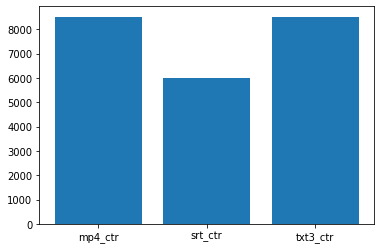

In [12]:
# Bar plot for visualizing the count of various file types
# X-axis: File Type
# Y-axis: Count
plt.bar(["mp4_ctr","srt_ctr","txt3_ctr"], [mp4_ctr,srt_ctr,txt3_ctr])

## Basic Metadata

In [13]:
# Constant label values which are extracted from the file name
COLUMN_LABELS = ['Pull Date','Year','Month','Day','TODO','Lang','Barcode','V No.','File Type']

In [14]:
# Create pandas DataFrame for all mp4 files
mp4_df = pd.DataFrame(mp4_files_split, columns=COLUMN_LABELS)
mp4_df

,Pull Date,Year,Month,Day,TODO,Lang,Barcode,V No.,File Type
0,1972-07-01,1972,07,01,0000,US,00010144,V0,DB.mp4
1,1972-10-06,1972,10,06,0000,US,00016471,V0,JS.mp4
2,1972-10-06,1972,10,06,0000,US,00015980,V1,JS.mp4
3,1972-09-14,1972,09,14,0000,US,00025933,B0,KC.mp4
4,1972-09-01,1972,09,01,0000,US,00016359,V0,WR.mp4
...,...,...,...,...,...,...,...,...,...
8508,1987-06-09,1987,06,09,0000,US,00021650,B0,KQ.mp4
8509,1987-06-22,1987,06,22,0000,US,00043099,B0,KH.mp4
8510,1987-06-10,1987,06,10,0000,US,NA012366,B0,MM.mp4
8511,1969-03-21,1969,03,21,0000,US,00010209,V0,DB.mp4


In [15]:
# Create pandas DataFrame for all srt files
srt_df = pd.DataFrame(srt_files_split, columns=COLUMN_LABELS)
srt_df

,Pull Date,Year,Month,Day,TODO,Lang,Barcode,V No.,File Type
0,1972-10-06,1972,10,06,0000,US,00015980,V1,JS.srt
1,1972-10-06,1972,10,06,0000,US,00016471,V0,JS.srt
2,1972-09-14,1972,09,14,0000,US,00025933,B0,KC.srt
3,1972-09-01,1972,09,01,0000,US,00016359,V0,WR.srt
4,1972-06-20,1972,06,20,0000,US,00019724,B3,WR.srt
...,...,...,...,...,...,...,...,...,...
5976,1987-06-04,1987,06,04,0000,US,00022777,B0,HM.srt
5977,1987-06-04,1987,06,04,0000,US,NA012623,B0,MM.srt
5978,1987-06-09,1987,06,09,0000,US,00021650,B0,KQ.srt
5979,1987-06-10,1987,06,10,0000,US,NA012366,B0,MM.srt


In [16]:
# Create pandas DataFrame for all txt3 files
txt3_df = pd.DataFrame(txt3_files_split, columns=COLUMN_LABELS)
txt3_df

,Pull Date,Year,Month,Day,TODO,Lang,Barcode,V No.,File Type
0,1972-07-01,1972,07,01,0000,US,00010144,V0,DB.txt3
1,1972-10-06,1972,10,06,0000,US,00015980,V1,JS.txt3
2,1972-10-06,1972,10,06,0000,US,00016471,V0,JS.txt3
3,1972-09-14,1972,09,14,0000,US,00025933,B0,KC.txt3
4,1972-09-01,1972,09,01,0000,US,00016359,V0,WR.txt3
...,...,...,...,...,...,...,...,...,...
8510,1987-06-09,1987,06,09,0000,US,00021650,B0,KQ.txt3
8511,1987-06-22,1987,06,22,0000,US,00043099,B0,KH.txt3
8512,1987-06-10,1987,06,10,0000,US,NA012366,B0,MM.txt3
8513,1969-03-21,1969,03,21,0000,US,00010209,V0,DB.txt3


### V No. Bar Plot

In [17]:
# Method to plot bar chart based on V No.
def v_bar_plot(df,title):
    ax = df['V No.'].value_counts().plot(kind='bar', figsize=(15,8), title=title)

    ax.set_xlabel("V No.")
    ax.set_ylabel("Freequency")

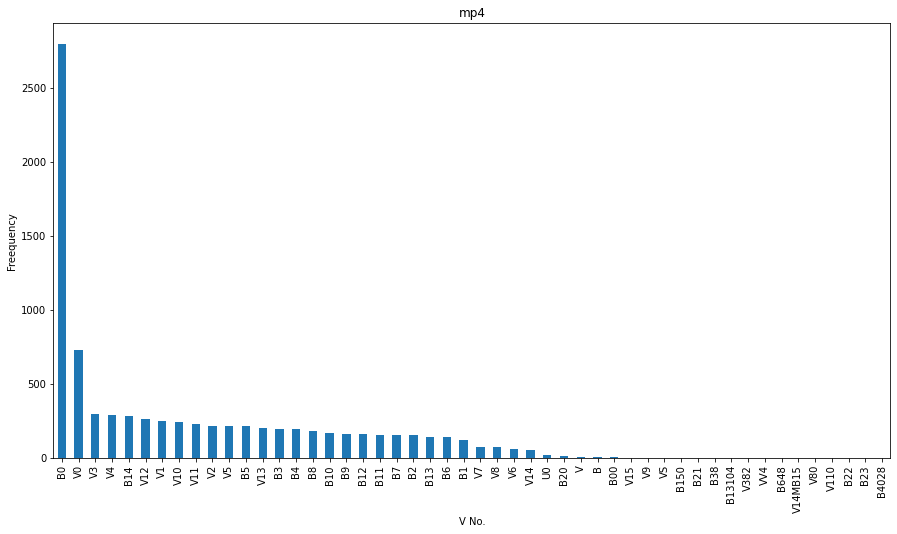

In [18]:
# Plots a bar chart for V No.
# X-Axis = V No.
# Y-Axis = Frequency
v_bar_plot(mp4_df,'mp4')

### Phase 1 V No. Count

In [19]:
mp4_series = mp4_df['V No.'].value_counts()
mp4_series

B0         2795
V0          729
V3          300
V4          289
B14         282
V12         265
V1          250
V10         246
V11         233
V2          217
V5          216
B5          216
V13         206
B3          197
B4          193
B8          180
B10         169
B9          162
B12         161
B11         157
B7          156
B2          153
B13         145
B6          139
B1          120
V7           77
V8           74
V6           62
V14          53
U0           23
B20          13
V             4
B             4
B00           4
V15           3
V9            3
VS            2
B150          2
B21           2
B38           1
B13104        1
V382          1
VV4           1
B648          1
V14MB15       1
V80           1
V110          1
B22           1
B23           1
B4028         1
Name: V No., dtype: int64

In [20]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [21]:
confusion_matrix(mp4_df,'V No.', 'Year')

Year,1960,1961,1962,1963,1969,1971,1972,1973,1974,1975,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,2006
V No.,,,,,,,,,,,,,,,,,,,,,
B,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0,2,0,0,0,0,1,357,0,1,1,...,555,98,68,99,157,179,225,399,1,2
B00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0
B1,0,0,0,0,0,0,2,0,0,0,...,23,11,3,0,0,0,2,70,0,0
B10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,153,9,0
B11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,145,9,0
B12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,153,8,0
B13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,134,10,0
B13104,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
